In [16]:
import matplotlib.pyplot as plt
import os
import numpy as np

# Raw Model Testing/Verification

Assault Direct Training


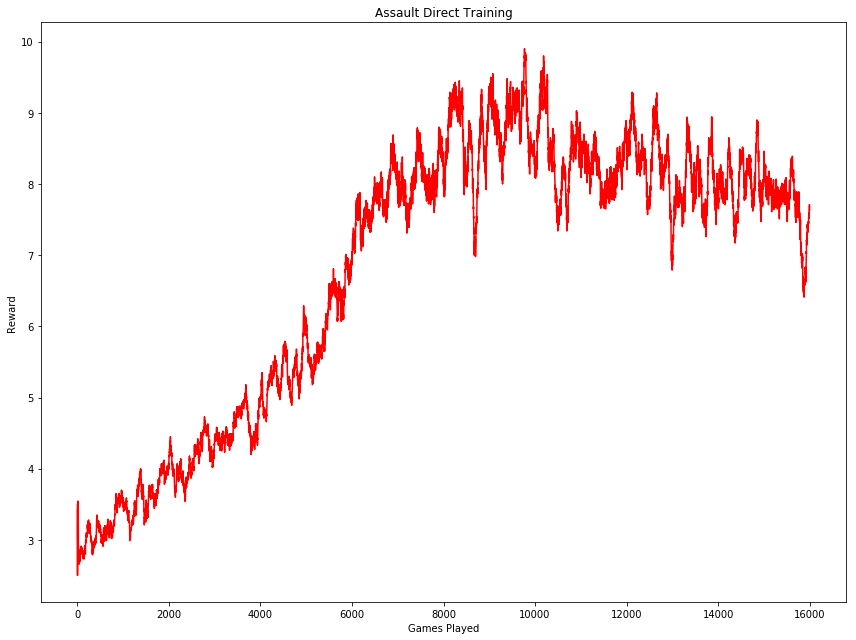

Multi-Env Training of SI + DA on Space Invaders


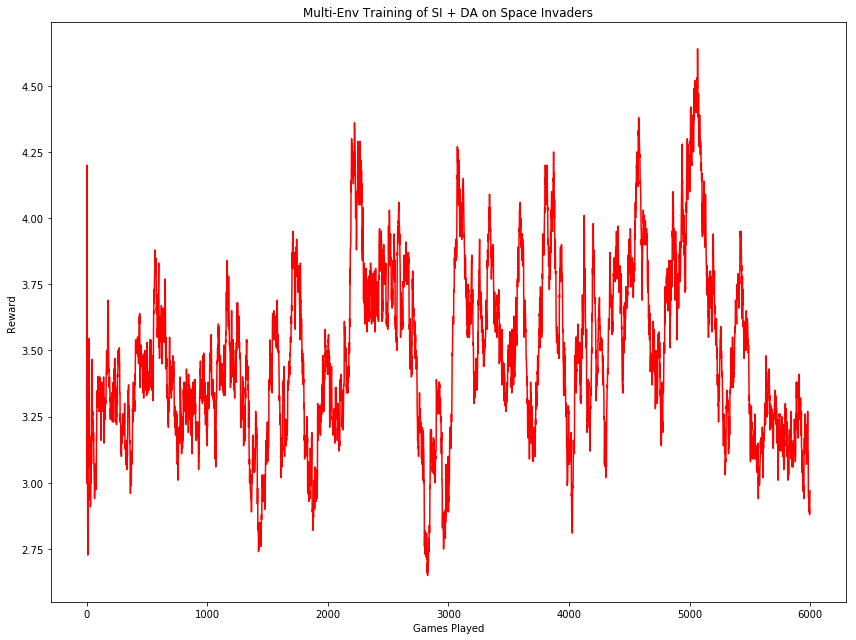

Demon Attack Direct Training


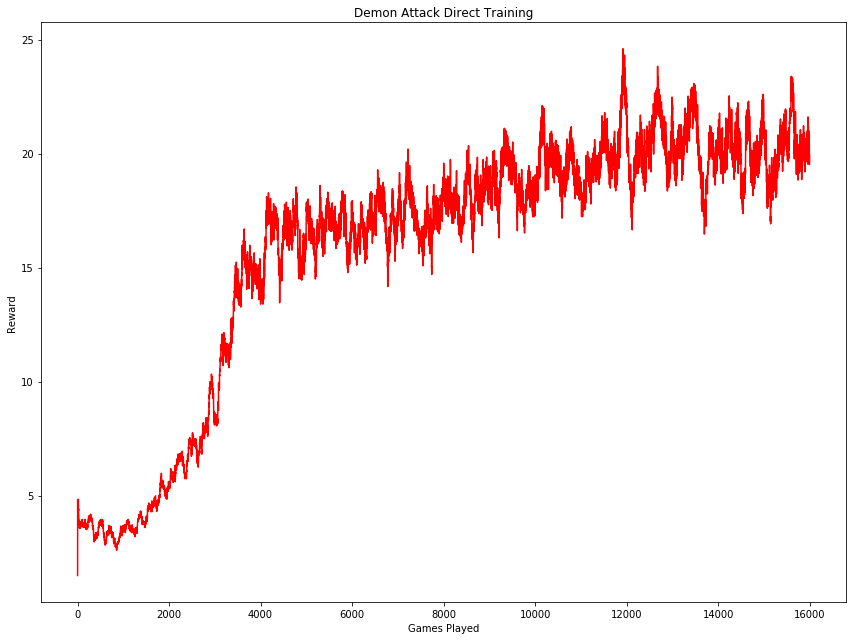

Space Invaders Direct Training


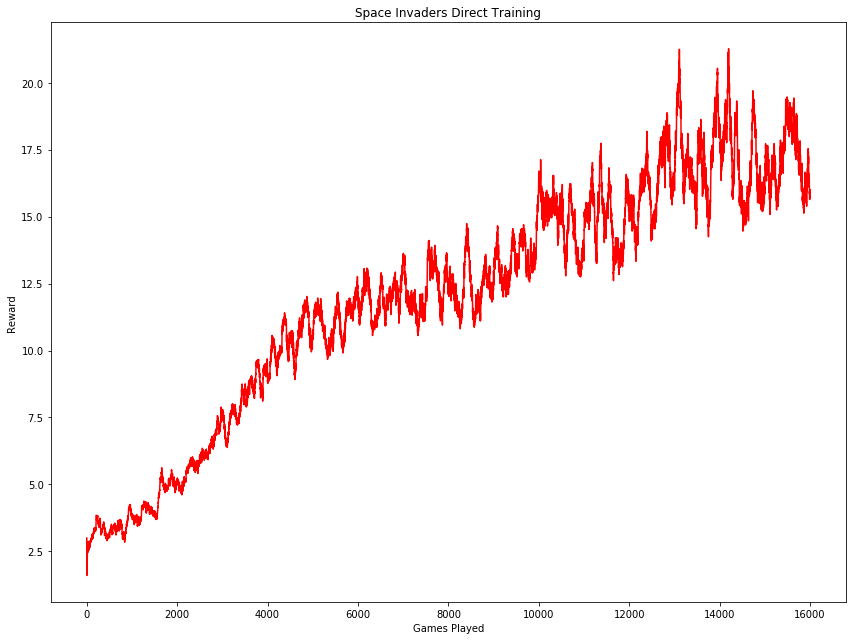

Space Invaders Mimic Training


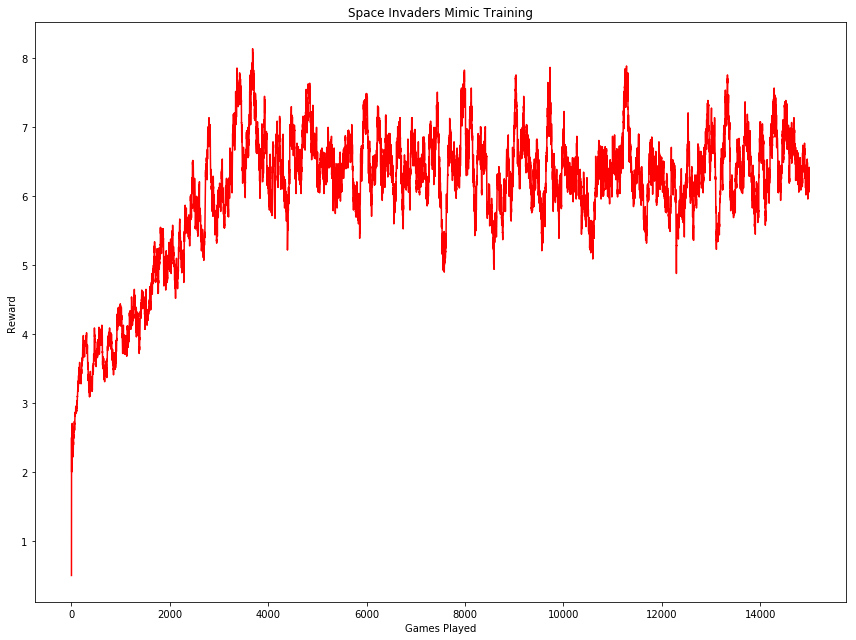

Space Invaders Mimic Training


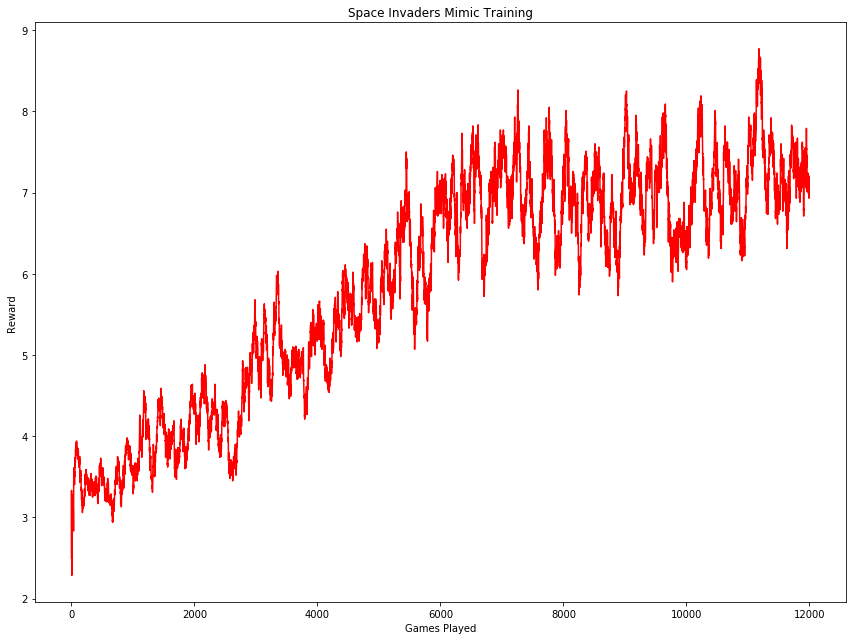

Space Invaders Mimic Training


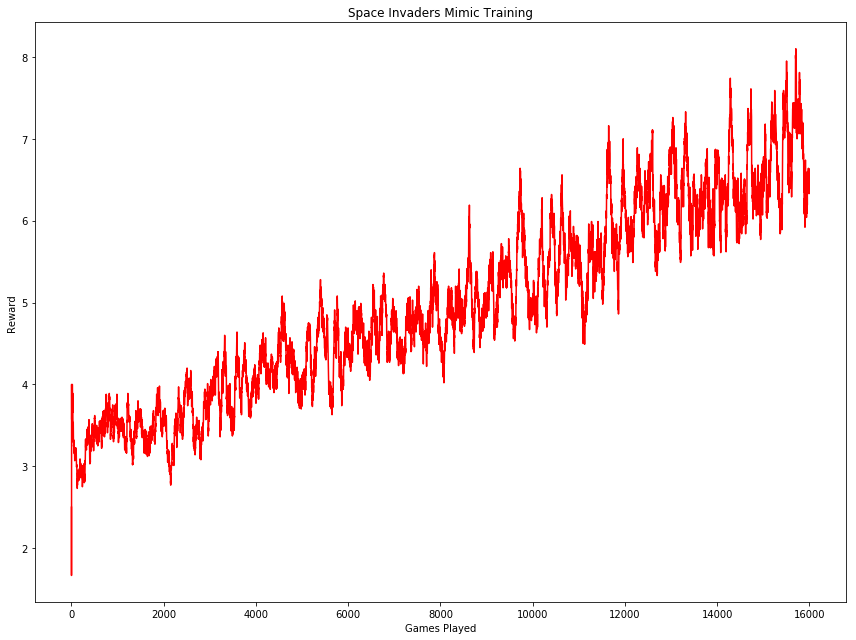

In [27]:
output_folder = 'figures'
default_figsize = (12, 9)

selected_models = [
    ('models/assault_reward.txt', 'Assault Direct Training', 'assault.png'),
    ('models_multi/demon_invaders_demon-attack_reward.txt', 'Multi-Env Training of SI + DA on Space Invaders', 'multienv.png'),
    ('models/demon-attack_reward.txt', 'Demon Attack Direct Training', 'demon-attack.png'),
    ('models/invaders_reward.txt', 'Space Invaders Direct Training', 'invaders.png'),
    ('mimic_models/invaders_reward.txt', 'Space Invaders Mimic Training', 'mimic_invaders.png'),
    ('mimic_models/invaders-am_reward.txt', 'Space Invaders Mimic Training', 'mimic_invaders-am.png'),
    ('mimic_models/invaders-am2_reward.txt', 'Space Invaders Mimic Training', 'mimic_invaders-am2.png'),
]

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

def plot_figure(reward_file, title, output_name):
    plt.figure(figsize=default_figsize)
    ys = np.loadtxt(reward_file)[1:16000]
    plt.plot(ys, c='r')
    plt.title(title)
    plt.xlabel('Games Played')
    plt.ylabel('Reward')
    plt.tight_layout()
    plt.savefig(os.path.join(output_folder, output_name))
    plt.show()
    plt.close()
    
for x in selected_models:
    print(x[1])
    plot_figure(*x)

## Transfer Learning

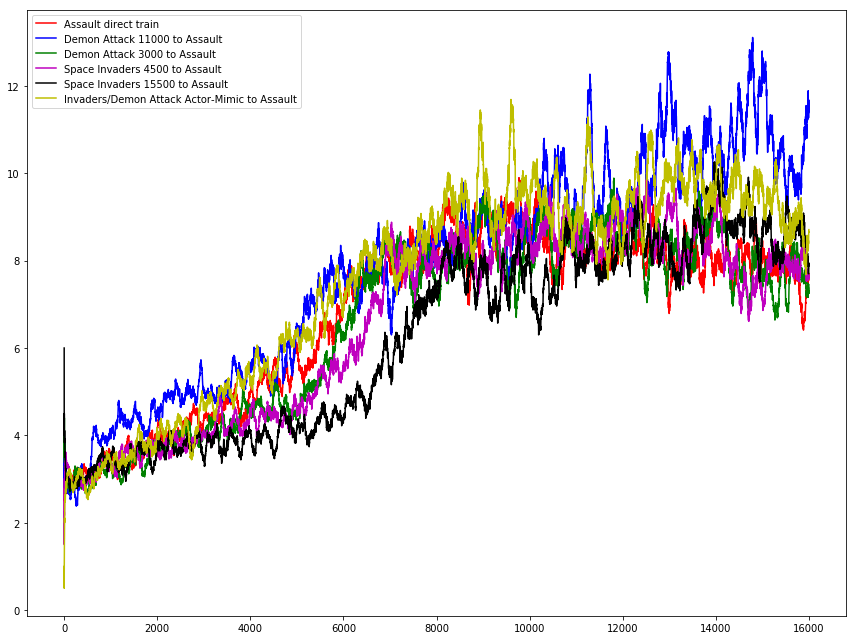

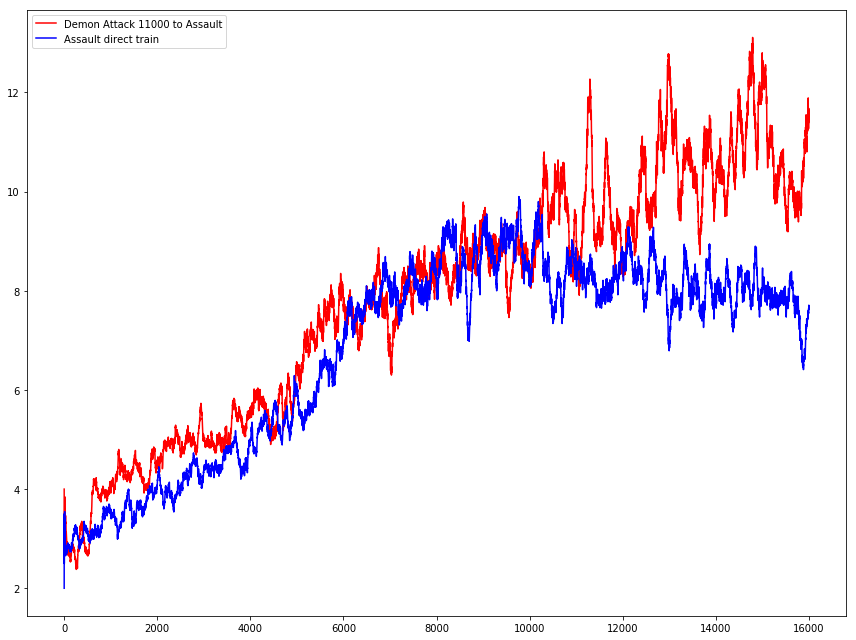

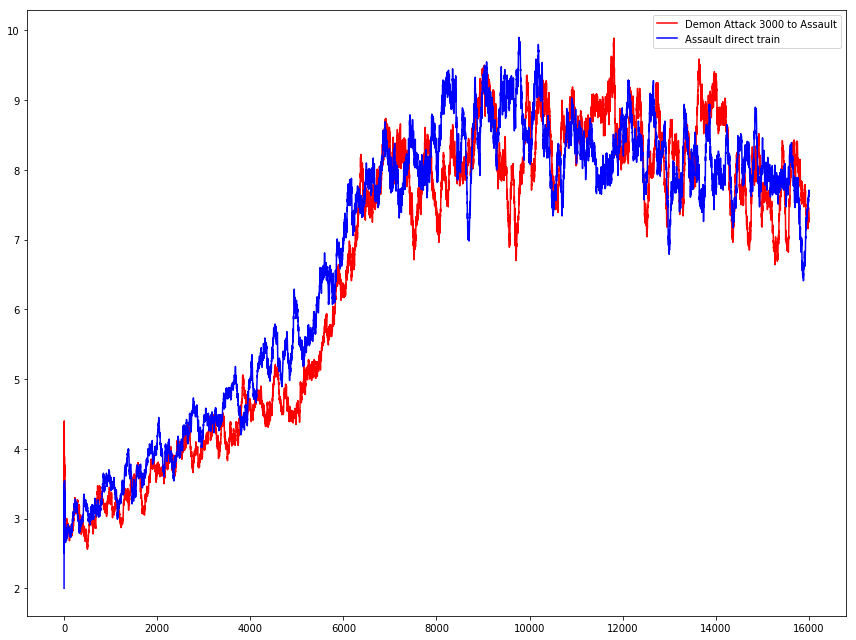

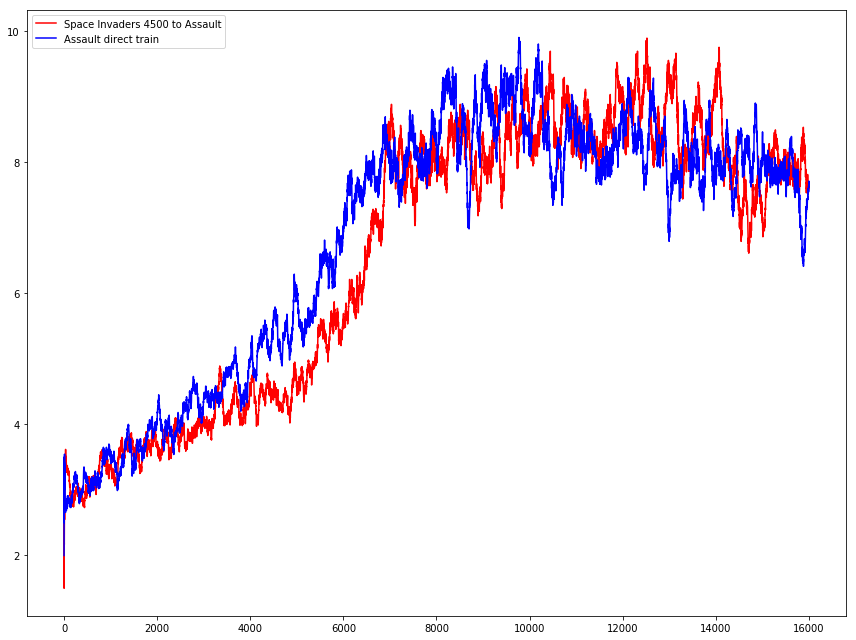

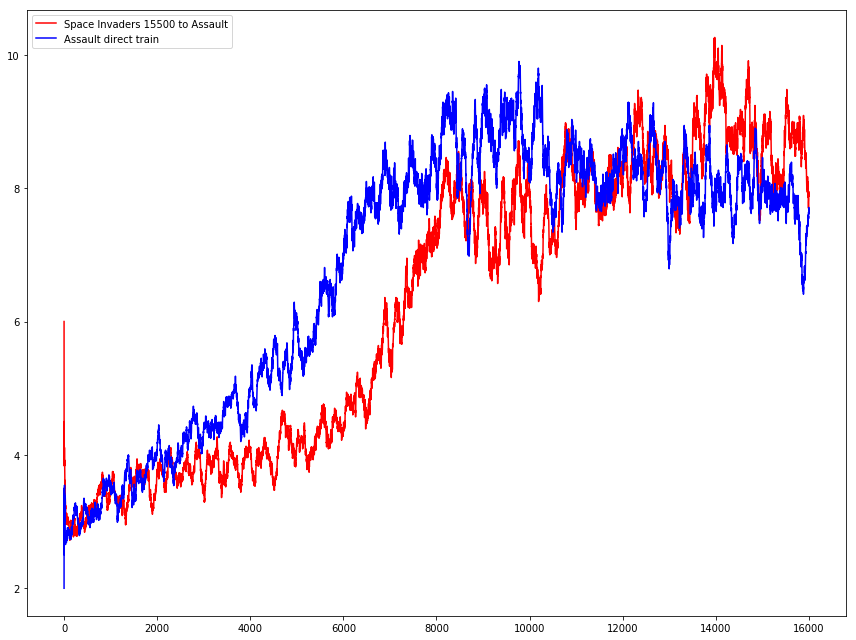

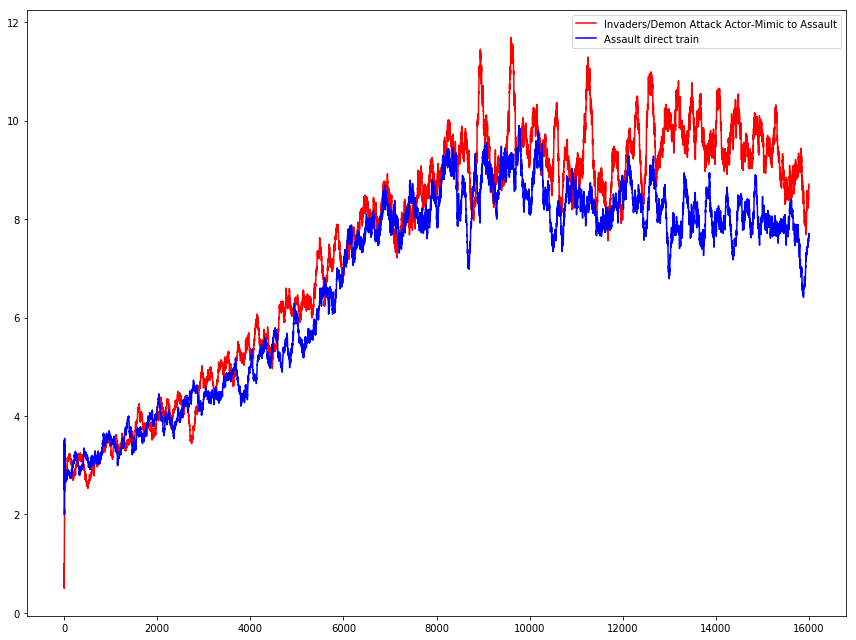

In [18]:
color_list = ['r', 'b', 'g', 'm', 'k', 'y']

plots = [
    ('models/assault_reward.txt', 'Assault direct train'),
    ('transfer_models/demon-attack_11000_to_assault_transfer_reward.txt', 'Demon Attack 11000 to Assault'),
    ('transfer_models/demon-attack_3000_to_assault_reward.txt', 'Demon Attack 3000 to Assault'),
    ('transfer_models/invaders_4500_to_assault_reward.txt', 'Space Invaders 4500 to Assault'),
    ('transfer_models/invaders_15500_to_assault_reward.txt', 'Space Invaders 15500 to Assault'),
    ('transfer_models/invaders-am_10500_to_assault_reward.txt', 'Invaders/Demon Attack Actor-Mimic to Assault')
]

def plot_transfer(tup_list, extra=""):
    plt.figure(figsize=default_figsize)
    
    for i, x in enumerate(tup_list):
        model_path, label = x
        color = color_list[i]
        ys = np.loadtxt(model_path)
        plt.plot(ys, c=color, label=label)
    plt.legend()
    plt.tight_layout()
    plt.savefig('figures/transfer_learning{}'.format(extra))
    plt.show()
    plt.close()
    
plot_transfer(plots)

single_plots = plots[1:]

for i, item in enumerate(single_plots):
    this_plot = [item] + [('models/assault_reward.txt', 'Assault direct train')]
    plot_transfer(this_plot, str(i))


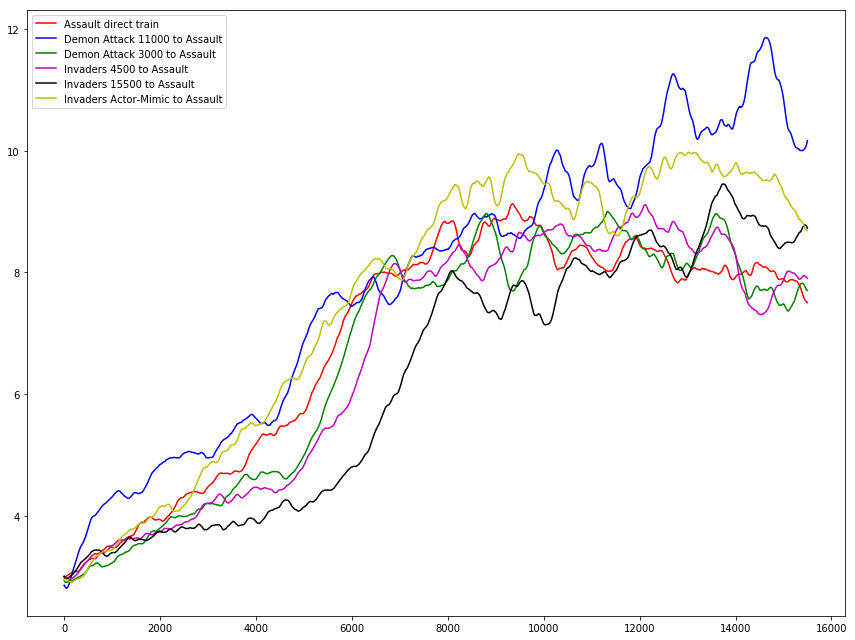

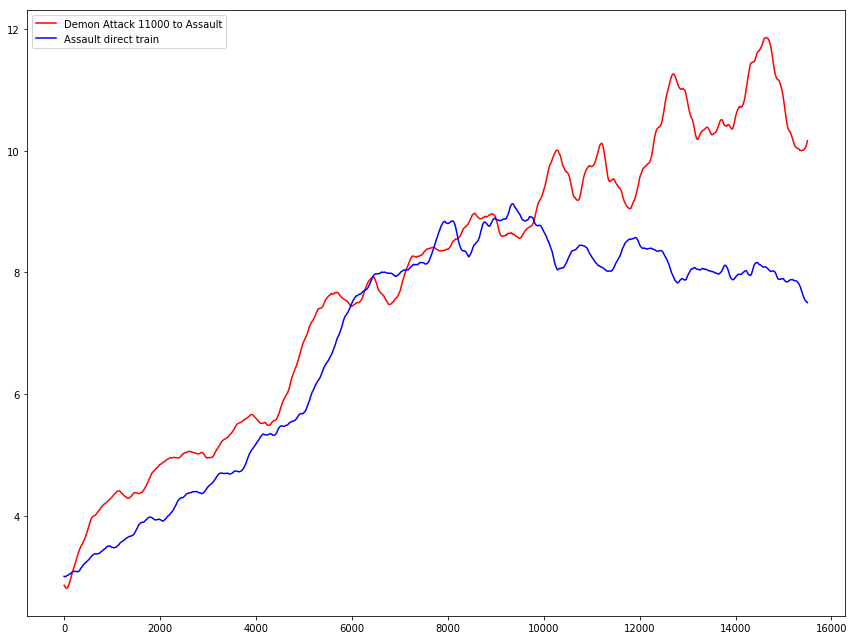

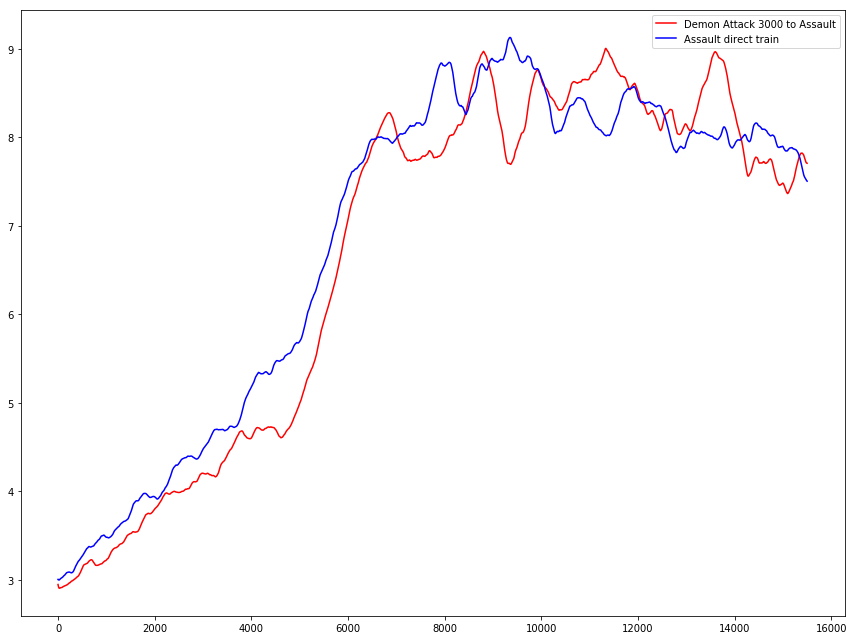

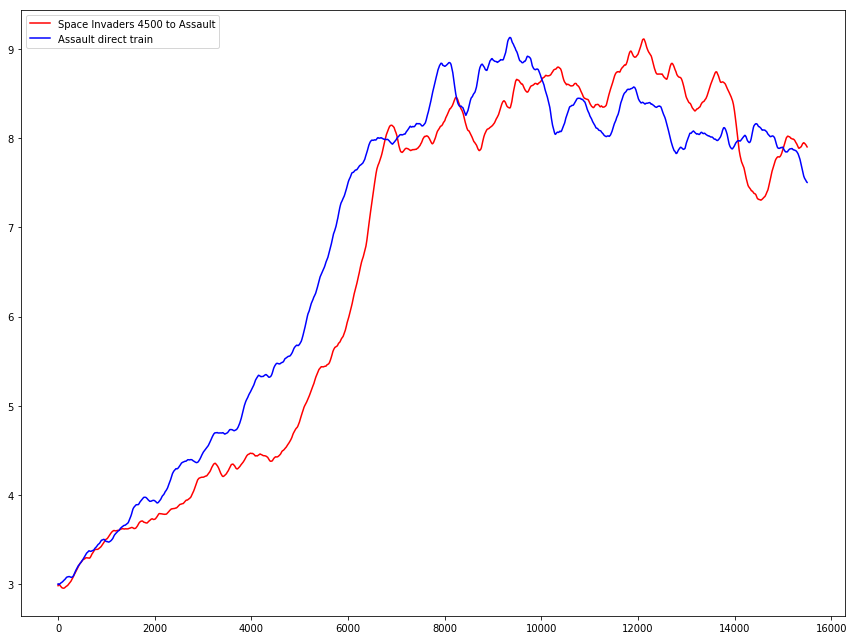

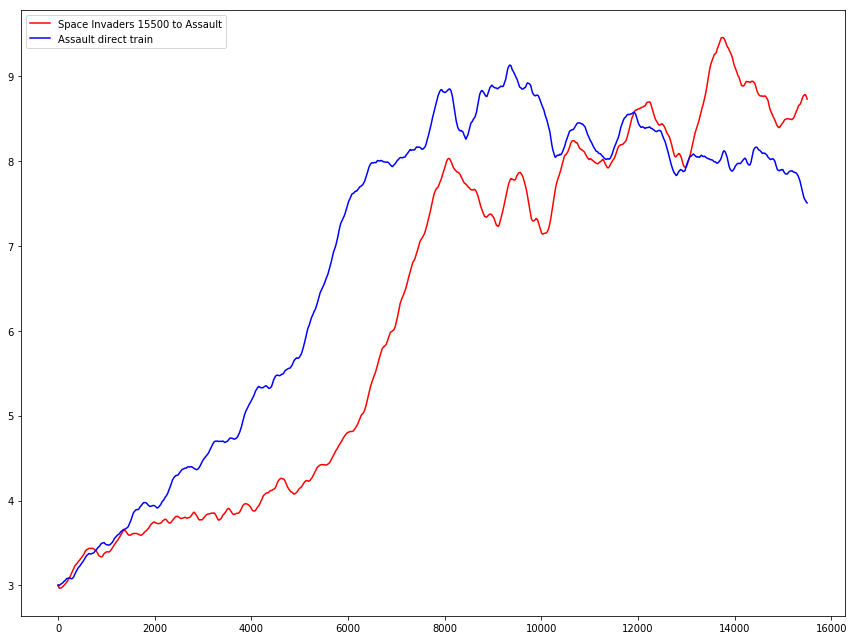

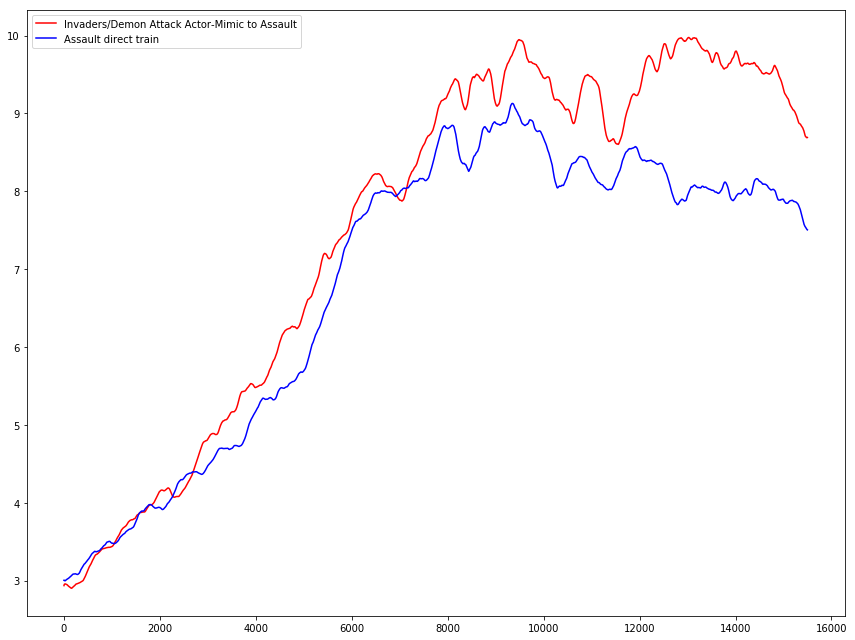

In [19]:
cfsize = 500
cfilter = np.array([1/cfsize] * cfsize)

color_list = ['r', 'b', 'g', 'm', 'k', 'y']

plots = [
    ('models/assault_reward.txt', 'Assault direct train'),
    ('transfer_models/demon-attack_11000_to_assault_transfer_reward.txt', 'Demon Attack 11000 to Assault'),
    ('transfer_models/demon-attack_3000_to_assault_reward.txt', 'Demon Attack 3000 to Assault'),
    ('transfer_models/invaders_4500_to_assault_reward.txt', 'Invaders 4500 to Assault'),
    ('transfer_models/invaders_15500_to_assault_reward.txt', 'Invaders 15500 to Assault'),
    ('transfer_models/invaders-am_10500_to_assault_reward.txt', 'Invaders Actor-Mimic to Assault')
]

def plot_transfer(tup_list, extra=""):
    plt.figure(figsize=default_figsize)
    
    for i, x in enumerate(tup_list):
        model_path, label = x
        color = color_list[i]
        ys = np.loadtxt(model_path)
        ys = np.convolve(ys, cfilter)
        plt.plot(ys[500:-500], c=color, label=label)
    plt.legend()
    plt.tight_layout()
    plt.savefig('figures/transfer_learning{}_smoothed'.format(extra))
    plt.show()
    plt.close()
    
plot_transfer(plots)

for i, item in enumerate(single_plots):
    this_plot = [item] + [('models/assault_reward.txt', 'Assault direct train')]
    plot_transfer(this_plot, str(i))

In [20]:
for x in single_plots:
    fname, label = x
    ref = np.loadtxt('models/assault_reward.txt')[2000:16000]
    current = np.loadtxt(fname)[2000:16000]

    ref = np.convolve(ref, cfilter)
    current = np.convolve(current, cfilter)
    diff = (current - ref)/ref
    print(label)
    print("Max increase: {:.3f}% at game {}".format(np.max(diff * 100), np.argmax(diff)))
    print("Max decrease: {:.3f}% at game {}".format(np.min(diff * 100), np.argmin(diff)))
    print()

Demon Attack 11000 to Assault
Max increase: 56.513% at game 14362
Max decrease: -6.422% at game 5275

Demon Attack 3000 to Assault
Max increase: 12.297% at game 9835
Max decrease: -16.012% at game 3128

Space Invaders 4500 to Assault
Max increase: 14.218% at game 14325
Max decrease: -21.104% at game 4396

Space Invaders 15500 to Assault
Max increase: 21.114% at game 14293
Max decrease: -36.783% at game 4585

Invaders/Demon Attack Actor-Mimic to Assault
Max increase: 27.063% at game 11304
Max decrease: -6.641% at game 37



In [26]:
table_csv = open('fp_table.csv', 'w')
for x in single_plots:
    fname, label = x
    ref = np.loadtxt('models/assault_reward.txt')[2000:16000]
    current = np.loadtxt(fname)[2000:16000]

    ref = np.convolve(ref, cfilter)
    current = np.convolve(current, cfilter)
    diff = (current - ref)/ref
    table_csv.write(','.join(
        [
            label,
            "{:.3f}%".format(np.max(diff * 100)),
            str(np.argmax(diff)),
            "{:.3f}%".format(np.min(diff * 100)),
            str(np.argmin(diff)),
        ]
    ))
    table_csv.write('\n')